In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import configs
import os

# Collect

In [68]:
pfiles = []

In [69]:
pfiles.append('pickles/figure8_collected_results_v3.p')
pfiles.append('pickles/figure8_collected_results_v2.p')

# for pfile in os.listdir('pickles/figure8_results_v2/'):
#     pfiles.append(f'pickles/figure8_results_v2/{pfile}')

In [70]:
_results = {}
for pfile in pfiles:
    with open(pfile, 'rb') as f:
        results = pickle.load(f)
    idxs = np.argwhere([v>135 for v in results['valid_score']]).squeeze()
    idxs = idxs.reshape((-1,))
    for key in results.keys():
        if key not in _results.keys():
            _results[key] = []
        for idx in idxs:
            _results[key].append(results[key][idx])
results = _results

In [72]:
results.keys()

dict_keys(['separability_matrix', 'separability_slope', 'separability_tracking', 'dimensionality_tracking', 'valid_score', 'fname', 'loss_weights'])

In [73]:
fname_order = ['mf_only', 'mf_and_vae', 'mf_and_mb', 'mf_and_mb_and_vae']

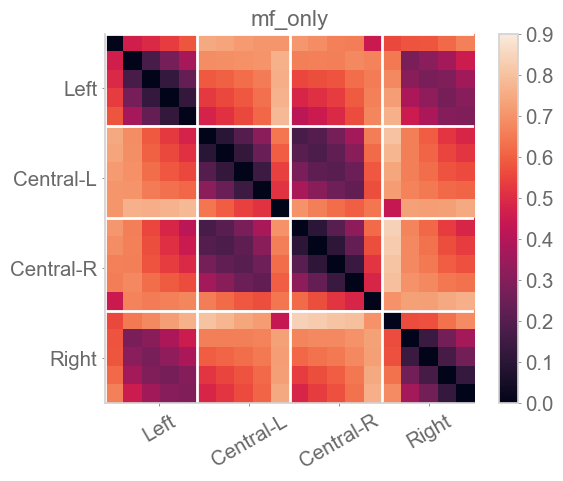

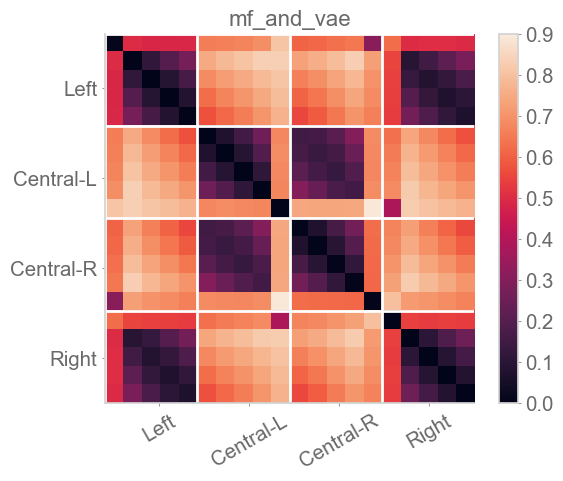

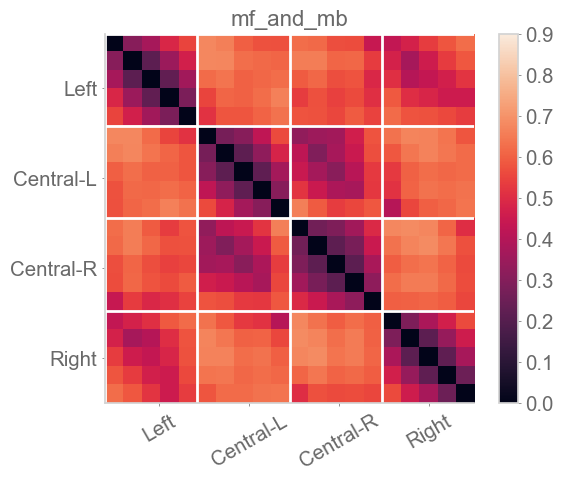

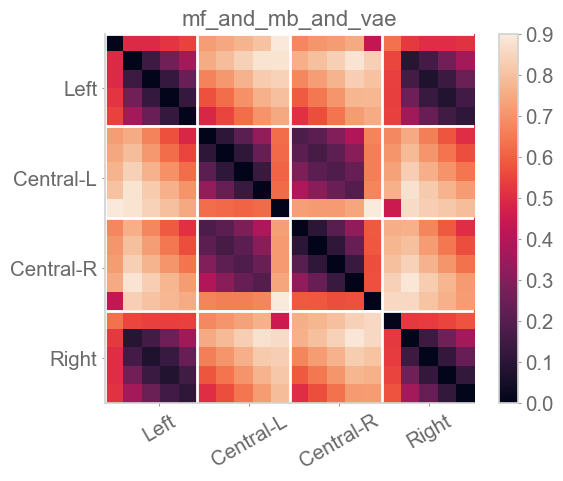

In [74]:
dist_data = {
    'fnames': [], 'vals': [], 'idxs': []
}
dim_data = {
    'fnames': [], 'dims': []
}
slope_data = {
    'fnames': [], 'slopes': []
}

for fname in fname_order:
    idxs = np.argwhere(np.array(results['fname']) == fname).squeeze()
    _matrices = [results['separability_matrix'][i] for i in idxs]
    _matrices_mean = np.nanmean(_matrices, axis=0)
    _slopes = [results['separability_slope'][i] for i in idxs]
    _dims = [results['dimensionality_tracking'][i] for i in idxs]
    
    height = _matrices_mean.shape[0]//4
    for i in range(height):
        for _matrix in _matrices:
            dist_data['fnames'].append(fname)
            dist_data['vals'].append(_matrix[height+i, height*2+i])
            dist_data['idxs'].append(i)
    dim_data['fnames'].extend(_dims)
    dim_data['dims'].extend([fname]*len(_dims))
    slope_data['fnames'].extend(_slopes)
    slope_data['slopes'].extend([fname]*len(_dims))
    
    plt.figure()
    plt.title(fname)
    plt.imshow(_matrices_mean, vmin=0, vmax=0.9)
    for boundary in [0, height, height*2, height*3]:
        plt.axhline(boundary-0.5, linewidth=2, color='white')
        plt.axvline(boundary-0.5, linewidth=2, color='white')
    plt.xticks(
        np.linspace(0, _matrices_mean.shape[0]-0.5, num=9, endpoint=True)[1::2],
        ['Left', 'Central-L', 'Central-R', 'Right'], rotation=30)
    plt.yticks(
        np.linspace(0, _matrices_mean.shape[0]-0.5, num=9, endpoint=True)[1::2],
        ['Left', 'Central-L', 'Central-R', 'Right'])
    plt.colorbar()
    plt.show()
dist_data = pd.DataFrame(dist_data)
dim_data = pd.DataFrame(dim_data)

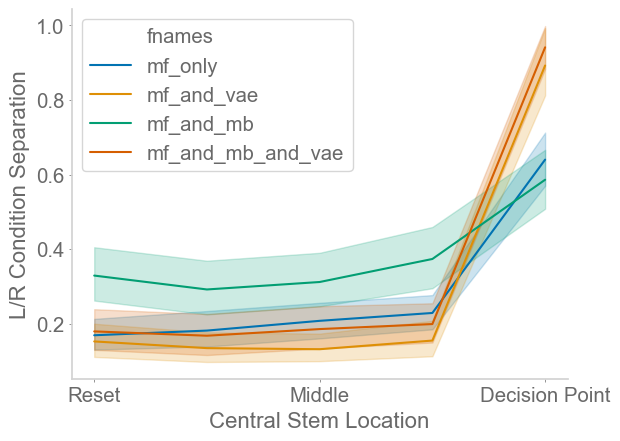

In [75]:
plt.figure()
sns.lineplot(
    x='idxs', y='vals', hue='fnames', data=dist_data,
    hue_order=fname_order
    )
plt.ylabel('L/R Condition Separation')
plt.xlabel('Central Stem Location')
plt.xticks([0, 2, 4], ['Reset', 'Middle', 'Decision Point'])
plt.show()

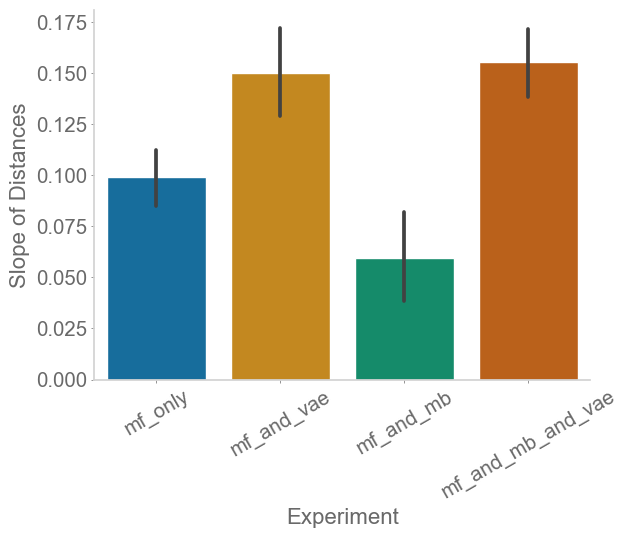

In [76]:
plt.figure()
sns.barplot(
    y='fnames', x='slopes', data=slope_data,
    order=fname_order
    )
plt.ylabel('Slope of Distances')
plt.xlabel('Experiment')
plt.xticks(rotation=30)
plt.show()

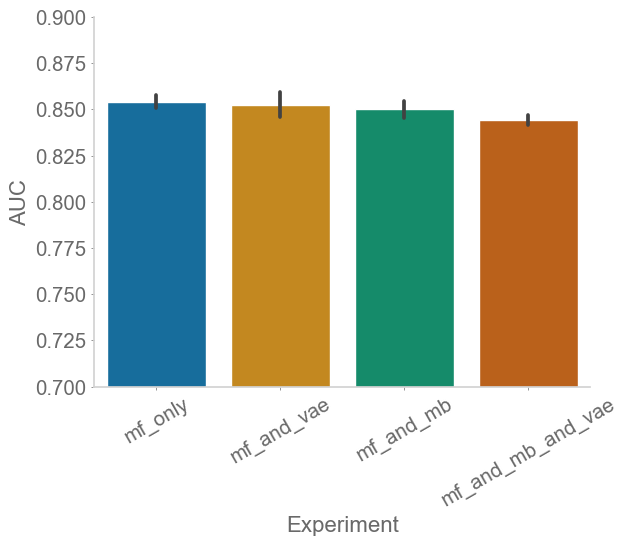

In [79]:
plt.figure()
sns.barplot(
    y='fnames', x='dims', data=dim_data,
    order=fname_order
    )
plt.ylim(0.7, 0.9)
plt.ylabel('AUC')
plt.xlabel('Experiment')
plt.xticks(rotation=30)
plt.show()

# Transfer

In [56]:
data = {
    'scores': [],
    'epochs': [],
    'fname': []
    }
pfile = 'pickles/transfer_figure8_grid_v5.p'
with open(pfile, 'rb') as f:
    results = pickle.load(f)
for valid_score, fname in zip(results['valid_scores'], results['fname']):
    for epoch, score in enumerate(valid_score):
        data['scores'].append(score)
        data['epochs'].append(epoch)
        data['fname'].append(fname)

In [57]:
df = pd.DataFrame(data)

<AxesSubplot: xlabel='epochs', ylabel='scores'>

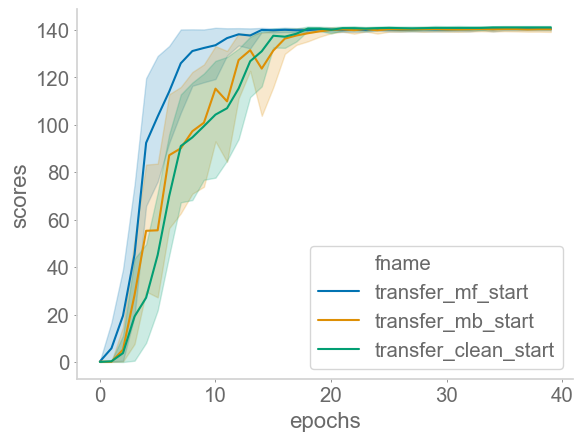

In [58]:
sns.lineplot(x='epochs', y='scores', hue='fname', data=df)

In [ ]:
# v5 for control: same task, with transfered representations